In [1]:
# kaggle --- PCA + KNN

In [2]:
# https://www.kaggle.com/code/krishnayogi/pca-knn-97-accuracy/notebook

In [10]:
import pandas as pd                            # File Handling
import numpy as np   

In [11]:
path = r"D:\Clivia's Notes\IOD_data\Kaggle\iris_kaggle.csv"
data = pd.read_csv(path)

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
data = data.dropna()

In [15]:
data.shape

(150, 6)

In [17]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
X = np.array(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [20]:
from sklearn.decomposition import PCA  

In [21]:
pca = PCA(n_components = 2)

In [22]:
pca.fit(X)

PCA(n_components=2)

In [23]:
X_pca = pca.transform(X)

In [24]:
explained_variance = pca.explained_variance_ratio_
print ("Explained variance: ", explained_variance)

Explained variance:  [0.92461621 0.05301557]


In [25]:
# Analysing Transformed Data

In [27]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [29]:
print(sum(pca.explained_variance_ratio_))

0.9776317750248034


In [31]:
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Species']]], axis = 1)     

In [32]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


In [34]:
import matplotlib.pyplot as plt       
import seaborn as sns

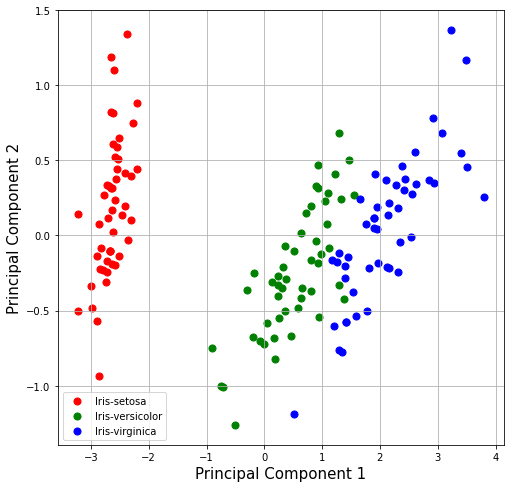

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                                # All specied name
colors = ['r', 'g', 'b']                                                                      # Giving species color
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']                            # Plotting a scatter plot
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [36]:
# Converting Species

In [37]:
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-setosa", value =0) 
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-versicolor", value =1) 
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-virginica", value =2) 

In [38]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


In [39]:
X = np.array(finalDf[["principal component 1", "principal component 2"]])
Y = np.array(finalDf["Species"])

In [41]:
from sklearn.model_selection import train_test_split  

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
from sklearn.neighbors import KNeighborsClassifier    

In [44]:
clf = KNeighborsClassifier(n_neighbors=5)

In [45]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [49]:
confusion_matrix(Y_test, y_pred)

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]], dtype=int64)

In [50]:
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print ("Accuracy of the prediction is: ",accuracy_score(Y_test, y_pred))

Accuracy of the prediction is:  0.9333333333333333
